In this notebook, we will cover:

* [Statistical Transformations](#Statistical-Transformations)
* [Position Adjustments](#Position-Adjustments)
* [Coordinate Systems](#Coordinate-Systems)

# Statistical Transformations

Recall the **diamonds** data set.

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)
print(diamonds)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# A tibble: 53,940 × 10
   carat       cut color clarity depth table price     x     y     z
   <dbl>     <ord> <ord>   <ord> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1   0.23     Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
2   0.21   Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
3   0.23      Good     E     VS1  56.9    65   327  4.05  4.07  2.31
4   0.29   Premium     I     VS2  62.4    58   334  4.20  4.23  2.63
5   0.31      Good     J     SI2  63.3    58   335  4.34  4.35  2.75
6   0.24 Very Good     J    VVS2  62.8    57   336  3.94  3.96  2.48
7   0.24 Very Good     I    VVS1  62.3    57   336  3.95  3.98  2.47
8   0.26 Very Good     H     SI1  61.9    55   337  4.07  4.11  2.53
9   0.22      Fair     E     VS2  65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good     H     VS1  59.4    61   338  4.00  4.05  2.39
# ... with 53,930 more rows


Let us create a **bar chart** using the **cut** variable. This is done by the ``geom_bar`` geometry.

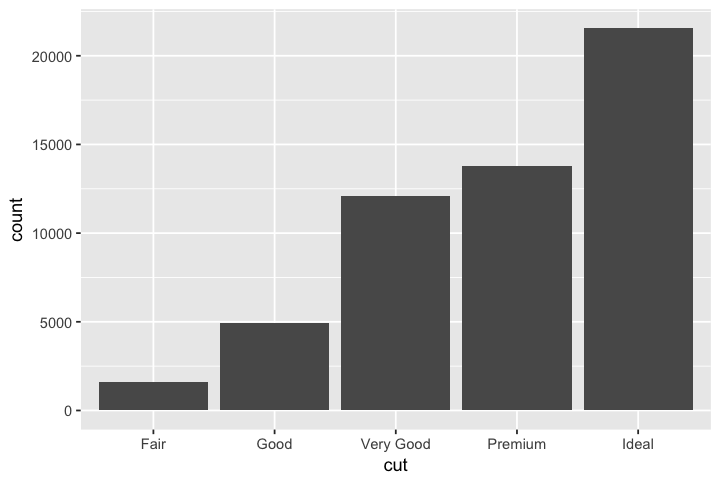

In [2]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

The `y` variable here, **count**, is not even a variable in our data set! What's going on? 🤔

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemtries and Statistical Transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

An example of a situation when you might want to override the default transformation is the following.

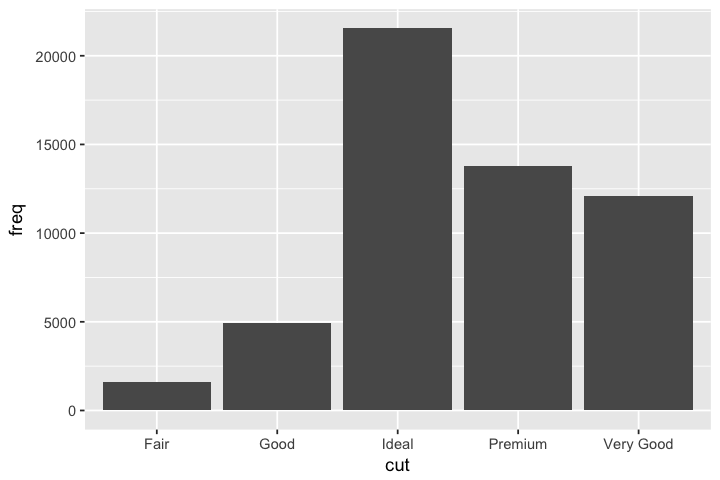

In [3]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

`geom_col` is used when you wants the bar heights to represent values in the data. E.g., the plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

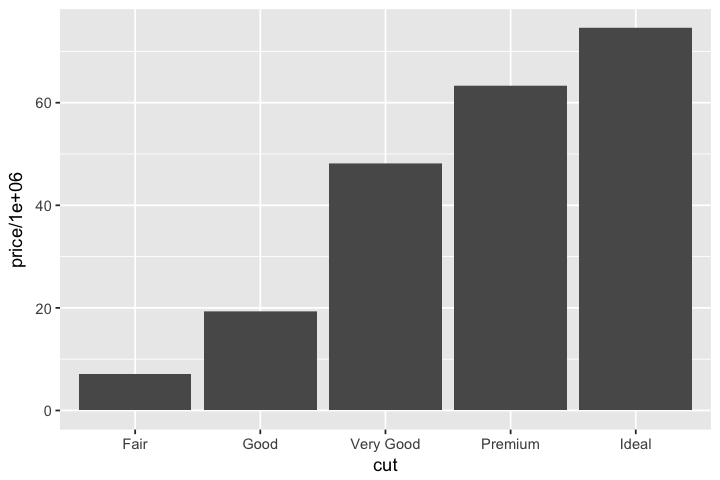

In [4]:
ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. E.g., one way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [5]:
(my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6))

cut,total_price_millions
Fair,7.01760
Good,19.27501
Very Good,48.10762
Premium,63.22150
Ideal,74.51349


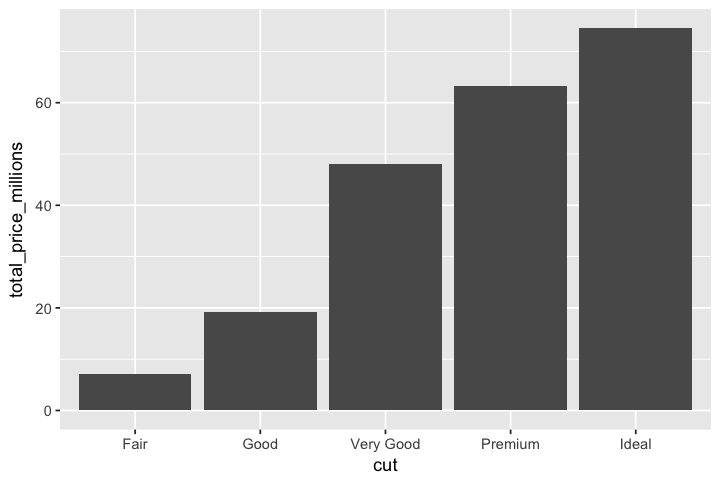

In [6]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

# Position Adjustments

Let us see what happens when we map the **color** aesthetic to the **cut** variable.

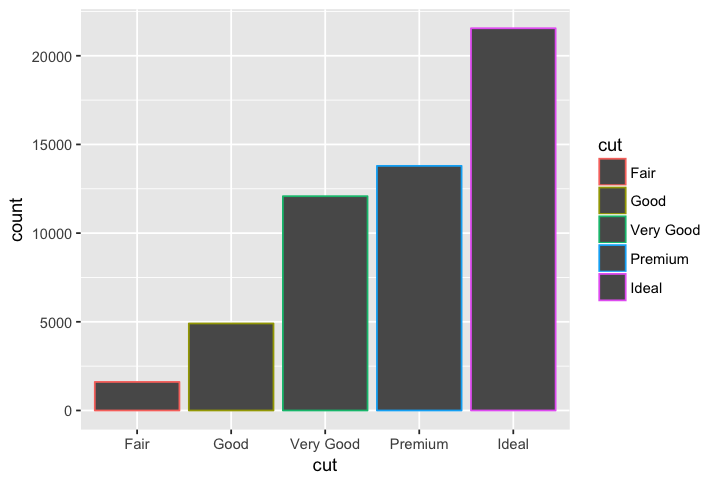

In [7]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic might be better.

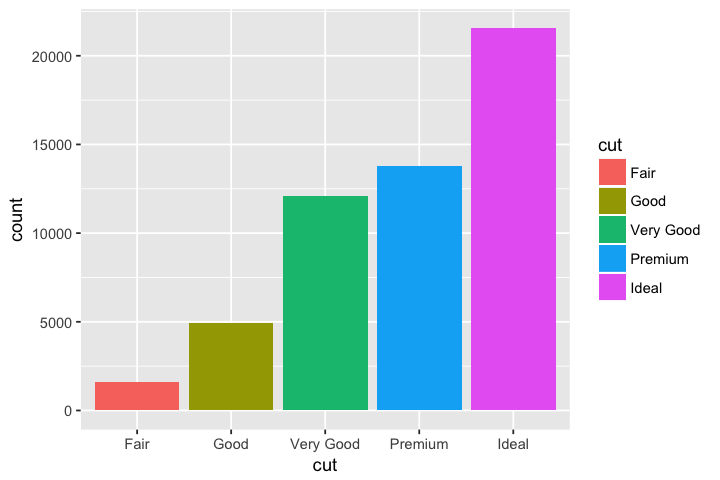

In [8]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

What happens when we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

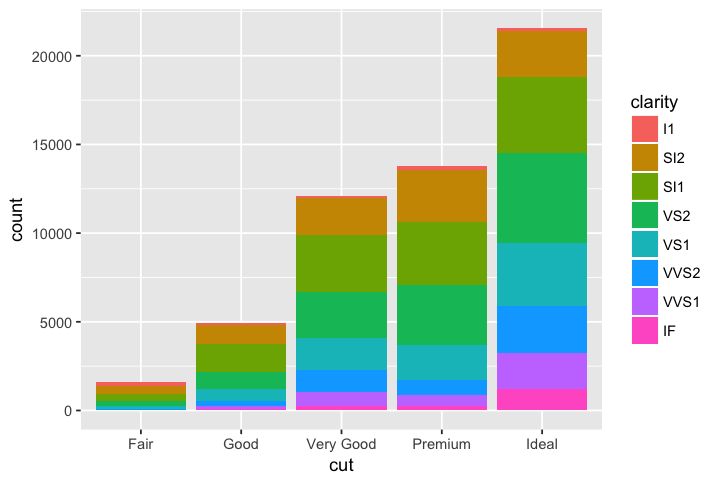

In [9]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

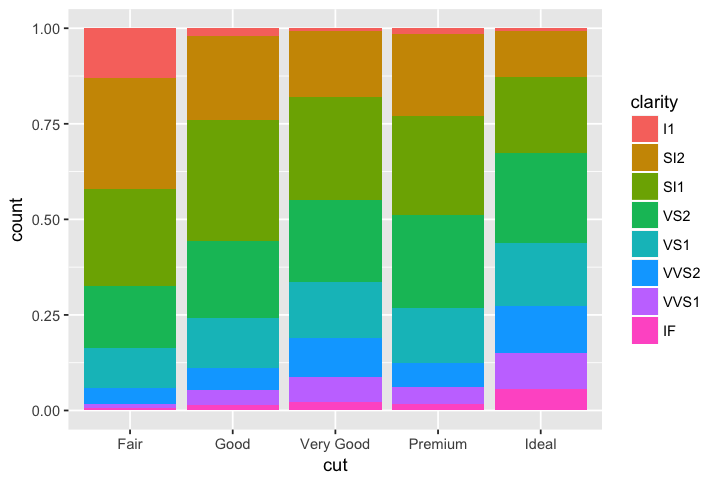

In [10]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

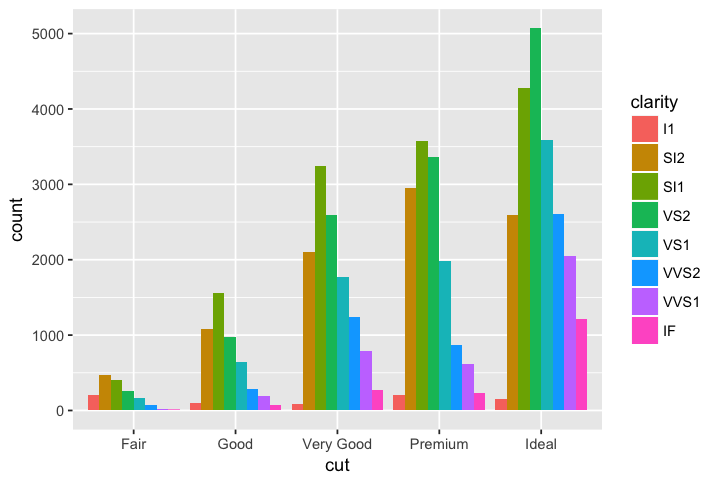

In [11]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") # put the bars side by side

There is a position adjustment that is less useful in bar plots but can be useful in scatter plots.

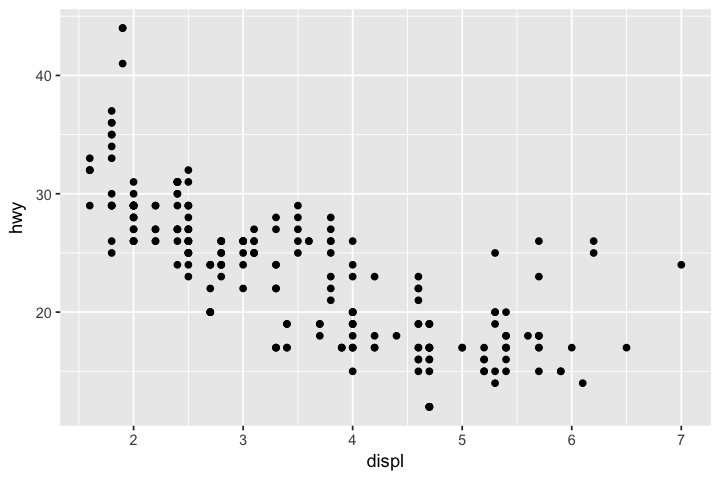

In [12]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

It's hard to notice but there are overlapping points in the plot above. For example, the lowest point (point with the lowest `hwy` value) actually consists of 5 overlapping points: 2 SUVs and 3 pickup trucks.

In [13]:
filter(mpg, hwy == 12)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


Let's see if the overlapping points show up when we use the **jitter** position adjustment in a normal scatter plot.

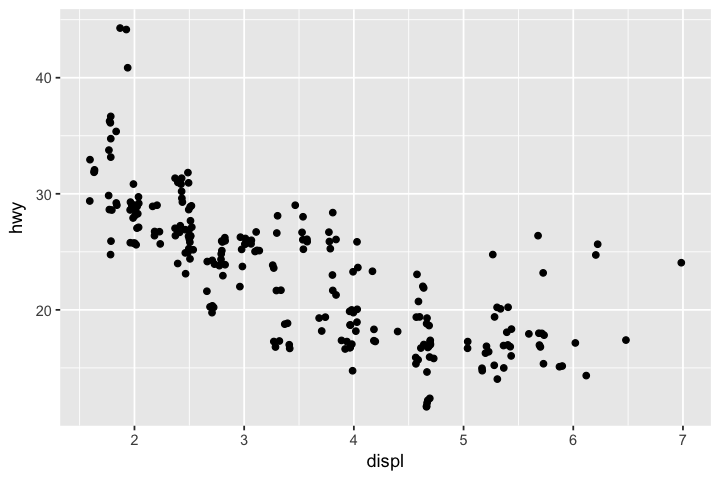

In [14]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

In [15]:
filter(mpg, hwy < 13)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


`geom_jitter` is just a shorthand for `geom_point(position = "jitter")`

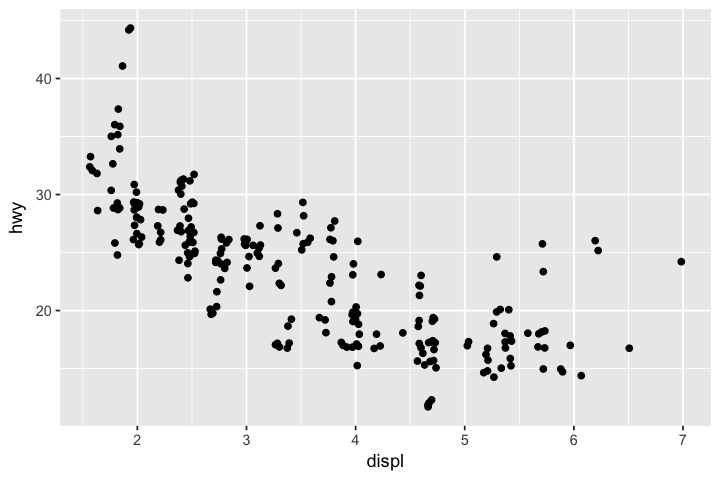

In [16]:
ggplot(data = mpg) +
    geom_jitter(mapping = aes(x = displ, y = hwy))

# Coordinate Systems

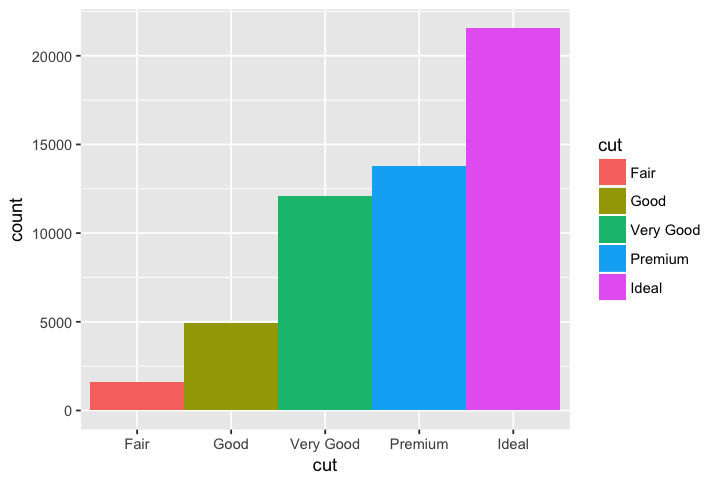

In [17]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) # set width so that the bars touch

Now let us change to polar coordinates to get a **Coxcomb chart**.

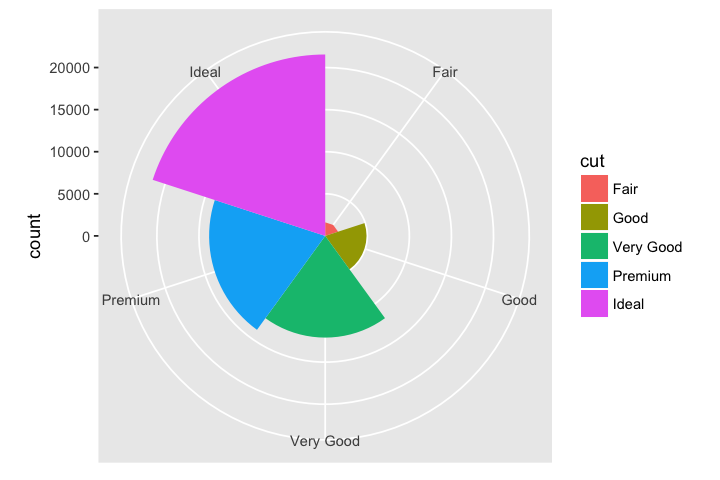

In [18]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

To get a **pie chart**, we have to create a **stacked bar chart** first

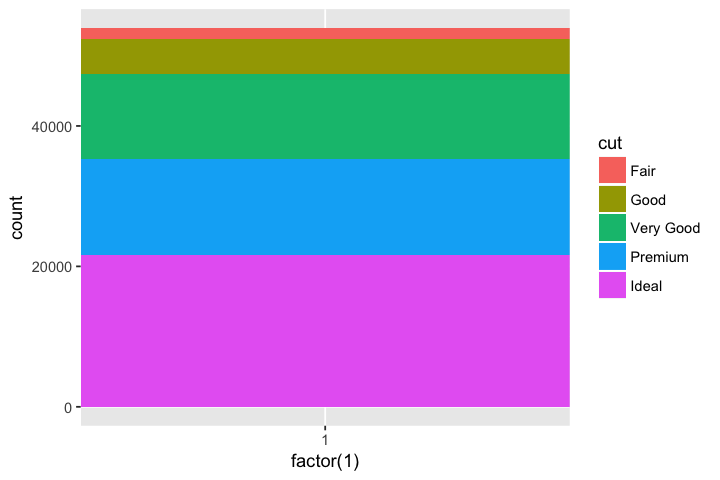

In [19]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = factor(1), fill = cut), width = 1)) # set width so that the bars touch

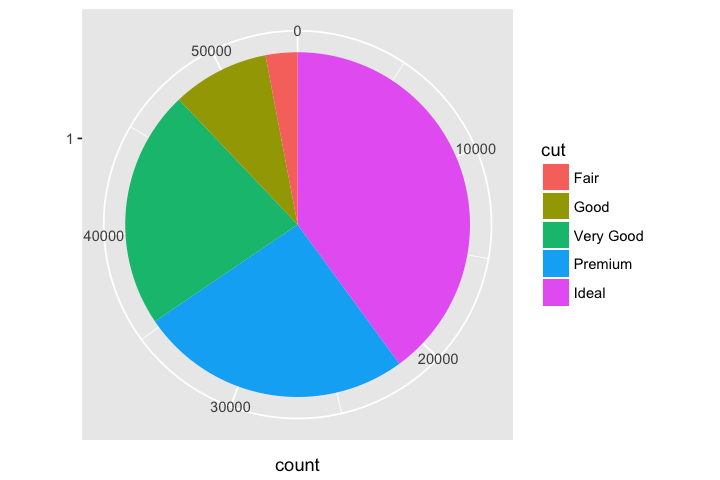

In [20]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar(theta = "y") # change to polar coordinates to get a pie chart

Notice that we mapped the Y axis of the bar chart to the angle **theta**. By default, it will map to the radial coordinate giving us a **bullseye chart**.

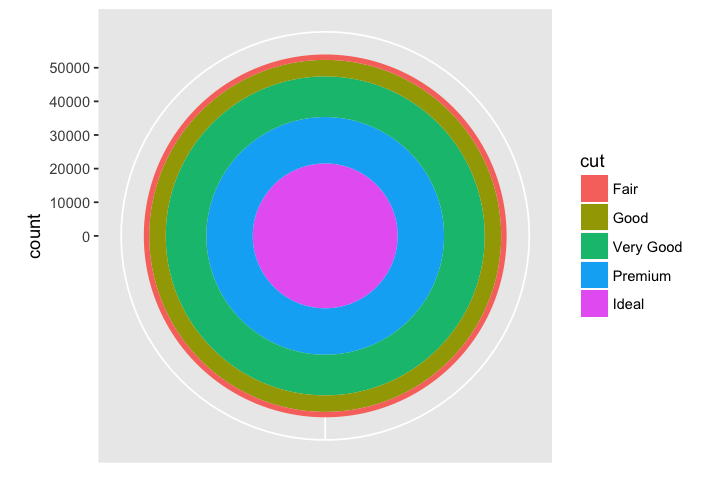

In [21]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a pie chart

Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```